In [1]:
# Data manipulation 
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Manifold and Classifier
from sklearn.manifold import TSNE
from sklearn.svm import SVC

# Feature selection and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# High dimensional data import
ansur = pd.read_csv('~/DevSpace/Data-Snippets/MachineLearning/datasets/ansur.csv')
ansur.drop('ID', axis=1, inplace=True)
print(f'Number of dimensions (cols): {len(ansur.columns)}')

Number of dimensions (cols): 94


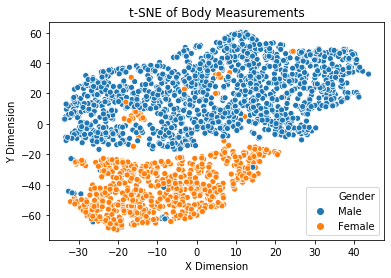

In [3]:
# Instanciate TSNE Model to visualize data
tsne_model = TSNE(learning_rate=50)

# Fit and transform numeric data from 4th column
tsne_features = tsne_model.fit_transform(ansur.iloc[:, 4:])

# Plot transformed data
sns.scatterplot(x=tsne_features[:, 0], y=tsne_features[:, 1], hue=ansur['Gender'])
plt.xlabel('X Dimension')
plt.ylabel('Y Dimension')
plt.title('t-SNE of Body Measurements')

plt.show()

In [4]:
# Select data
y = ansur['Gender']
X = ansur.drop(['Branch', 'Component', 'Gender'], axis=1)

# Split train, test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=12)

# Instanciate model and fit model
svm = SVC()
svm.fit(X_train, y_train)

# Measure accuracy
acc_train = accuracy_score(y_train, svm.predict(X_train))
acc_test = accuracy_score(y_test, svm.predict(X_test))

# Measure overfitting
print(f'{acc_train = }')
print(f'{acc_test = }')

acc_train = 0.9714285714285714
acc_test = 0.9666666666666667


In [5]:
# Predict Gender based on 'neckcircumferencebase' feature 
y = ansur['Gender']
X = ansur[['neckcircumferencebase']]

# Split train, test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=12)

# Instanciate model and fit model
svm = SVC()
svm.fit(X_train, y_train)

# Measure accuracy
acc_train = accuracy_score(y_train, svm.predict(X_train))
acc_test = accuracy_score(y_test, svm.predict(X_test))

# Measure overfitting
print(f'{acc_train = }')
print(f'{acc_test = }')

acc_train = 0.9342857142857143
acc_test = 0.9316666666666666


#### One feature managed a 93% percent accuracy vs 96 features for 97%